**Aluno: Talles Henrique Sousa Gomes**

In [0]:
# Importação das bibliotecas necessárias

import pandas as pd # para criação do data frame
from sklearn.model_selection import train_test_split # para separação dos conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression # para construção do modelo de Regressão Logística
from sklearn import metrics # para computação das métricas de avaliação
from sklearn.metrics import confusion_matrix
import seaborn as sn # para visualização dos resultados

In [8]:
# Importando os dados de contratos
titanic_data = pd.read_csv("titanic3.csv")
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##Quais as minhas variáveis?

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## Quais os tipos das minhas variáveis?

* pclass - Qualitativa ordinal;
* survived - Qualitativa ordinal;
* name - Qualitativa nominal
* sex - Qualitativa nominal
* age - quantitativa discreta
* sibsp - quantitativa discreta
* parch - quantitativa discreta
* ticket - Qualitativa nominal
* fare - quantitativa continua
* cabin - qualitativa nominal
* embarked - qualitativa nominal
* boat -
* body - quantitativa continua
* home.dest - qualitativa nominal


## Tenho valores faltantes ou nulos?

In [10]:
print(titanic_data.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [0]:
titanic_data = titanic_data.fillna(titanic_data.median())

In [12]:
data = pd.DataFrame(titanic_data[['sex']])

print(pd.get_dummies(data))

      sex_female  sex_male
0              1         0
1              0         1
2              1         0
3              0         1
4              1         0
...          ...       ...
1304           1         0
1305           1         0
1306           0         1
1307           0         1
1308           0         1

[1309 rows x 2 columns]


Interpretação do sumário

In [13]:
titanic_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.503186,0.498854,0.385027,33.281086,155.537051
std,0.837836,0.486055,12.905241,1.041658,0.865560,51.741500,29.639390
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,155.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,155.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## tenho relação/correlação forte entre variáveis do meu dataset?

In [14]:
titanic_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.377908,0.060832,0.018322,-0.558683,-0.013432
survived,-0.312469,1.000000,-0.043817,-0.027825,0.082660,0.244414,-0.014250
age,-0.377908,-0.043817,1.000000,-0.189972,-0.125851,0.178182,0.029037
sibsp,0.060832,-0.027825,-0.189972,1.000000,0.373587,0.160349,-0.028519
parch,0.018322,0.082660,-0.125851,0.373587,1.000000,0.221635,0.012973
fare,-0.558683,0.244414,0.178182,0.160349,0.221635,1.000000,-0.011995
body,-0.013432,-0.014250,0.029037,-0.028519,0.012973,-0.011995,1.000000


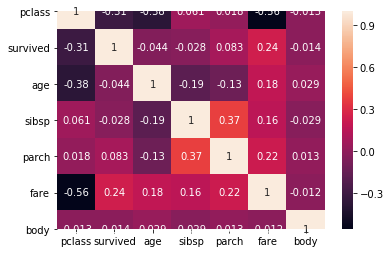

In [15]:
# Gera o gráfico da matriz de confusão
sn.heatmap(titanic_data.corr(), annot=True)

## Quais variáveis imagino que terão influencia na pergunta que desejo responder?

* fare, pclass, age e classe

## Qual o modelo que utilizarei para prever a chance de sobrevivencia?

* regressão logistica
* Árvore de decisão
* Floresta aleatória

## Quais métricas utilizarei para avaliar meu modelo?

Acurácia

Código:

In [0]:
preditores = titanic_data[['fare', 'pclass','age','parch']]
alvo = titanic_data['survived']

In [0]:
preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(preditores, alvo, test_size=0.30, random_state=0)

In [18]:
# Instancia o modelo de regressão logística com parâmetros default
modelo_reglog = LogisticRegression()

# Treina o modelo com base nos preditores e variável alvo
modelo_reglog.fit(preditores_treino, alvo_treino)

# Prevê, para os dados do conjunto de teste, resultados para a variável alvo
alvo_pred = modelo_reglog.predict(preditores_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
# Matriz de confusão
print(confusion_matrix(alvo_teste, alvo_pred))

[[213  33]
 [ 85  62]]


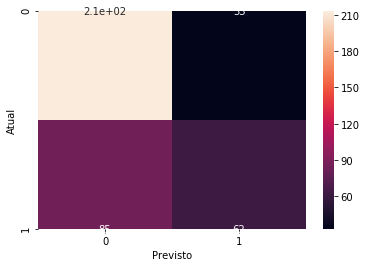

In [20]:
matriz_confusao = pd.crosstab(alvo_teste, alvo_pred, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao, annot=True)

In [21]:
# Acurácia do modelo
print('Acurácia: ', metrics.accuracy_score(alvo_teste, alvo_pred))

print('Precisão: ', metrics.precision_score(alvo_teste, alvo_pred))

print('Revocação: ', metrics.recall_score(alvo_teste, alvo_pred))

print('F1-Measure: ', metrics.f1_score(alvo_teste, alvo_pred))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, alvo_pred))

Acurácia:  0.6997455470737913
Precisão:  0.6526315789473685
Revocação:  0.4217687074829932
F1-Measure:  0.512396694214876
ROC AUC:  0.6438111830097893


Árvore de decisão:

In [0]:
preditores_tree = titanic_data[['fare', 'pclass']]
alvo_tree = titanic_data['survived']

preditores_treino_tree, preditores_teste_tree, alvo_treino_tree, alvo_teste_tree = train_test_split(preditores_tree, alvo_tree, test_size=0.30, random_state=0)

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Cria uma instância default
dt = DecisionTreeClassifier()

# Treina o modelo com os dados dos alunos
arvore_decisao = dt.fit(preditores_treino_tree, alvo_treino_tree)

In [0]:
# Realiza a previsão nos dados de teste
arvore_previsao = arvore_decisao.predict(preditores_teste_tree)

In [25]:
print("Acurácia: ", metrics.accuracy_score(alvo_teste_tree, arvore_previsao))

print('Precisão: ', metrics.precision_score(alvo_teste_tree, arvore_previsao))

print('Revocação: ', metrics.recall_score(alvo_teste_tree, arvore_previsao))

print('F1-Measure: ', metrics.f1_score(alvo_teste_tree, arvore_previsao))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste_tree, arvore_previsao))

Acurácia:  0.7150127226463104
Precisão:  0.6804123711340206
Revocação:  0.4489795918367347
F1-Measure:  0.5409836065573771
ROC AUC:  0.6614816658370666


In [0]:
# Código para treinamento da Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier 

In [0]:
preditores_random_tree = titanic_data[['sibsp', 'pclass','parch']]
alvo_random_tree = titanic_data['survived']
preditores_treino_random_tree, preditores_teste_random_tree, alvo_treino_random_tree, alvo_teste_random_tree = train_test_split(preditores_random_tree, alvo_random_tree, test_size=0.30, random_state=0)

In [0]:
# Instanciao objeto da Floresta Aleatória e define o número de árvores a serem utilizadas
floresta = RandomForestClassifier(n_estimators=1000)

# x_train, x_test, y_train, y_test

# Treinamento do modelo
floresta.fit(preditores_treino_random_tree, alvo_treino_random_tree)

# Prevê a partir dos preditores de testes
predicted = floresta.predict(preditores_teste_random_tree)

In [29]:
predicted

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [30]:
print(confusion_matrix(alvo_teste_random_tree, predicted))

[[199  47]
 [ 64  83]]


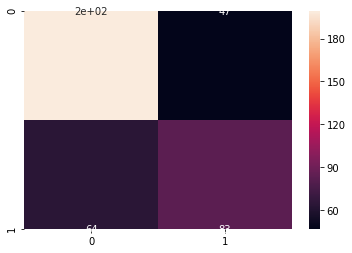

In [31]:
sn.heatmap(confusion_matrix(alvo_teste_random_tree, predicted), annot=True)

In [32]:
print('Acurácia: ', metrics.accuracy_score(alvo_teste_random_tree, predicted))

print('Precisão: ', metrics.precision_score(alvo_teste_random_tree, predicted))

print('Revocação: ', metrics.recall_score(alvo_teste_random_tree, predicted))

print('F1-Measure: ', metrics.f1_score(alvo_teste_random_tree, predicted))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste_random_tree, predicted))

Acurácia:  0.7175572519083969
Precisão:  0.6384615384615384
Revocação:  0.564625850340136
F1-Measure:  0.5992779783393501
ROC AUC:  0.6867844698855152
